# Exploratory Data Analysis (EDA) of the Automobile Dataset

This Jupyter Notebook focuses on **Exploratory Data Analysis (EDA)** of the **automobile** dataset. It encompasses generating visualizations, exploring different aspects of the dataset, and documenting findings. 

The primary aim of this project is to uncover and explain insights into the characteristics, trends, and patterns present in the **automobile** dataset in detail. A comprehensive report on the findings in this Jupyter Notebook can be found in the **automobile_EDA_ Doc.pdf** document. You can access the report on my GitHub portfolio in the same folder where this notebook is located.


In [2]:
# Import standard libraries
import ast  # For safely evaluating strings containing Python expressions
import json  # For parsing and manipulating JSON data
from datetime import datetime  # For handling date and time operations

# Import third-party libraries
import numpy as np  # Library for numerical operations and array manipulation
import pandas as pd  # Data manipulation and analysis library providing data structures for working with structured data
import fuzzywuzzy  # Library for fuzzy string matching
from fuzzywuzzy import process  # Provides functions for processing fuzzy matches and scoring
import matplotlib.pyplot as plt  # Plotting library for creating static, animated, and interactive visualizations
import seaborn as sns  # Statistical data visualization library based on matplotlib for creating attractive graphics

# Enable inline plotting for Jupyter notebooks
%matplotlib inline  


## Load the Autombile Dataset
Let's load the automobile dataset and take a look at the initial data.


In [3]:
# Load the automobile dataset
automobile_df = pd.read_csv('automobile.txt')

# Display the first 5 rows of the dataframe
automobile_df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Explore the dataset

In [4]:
# Get data info
print(f"Data info:\n\n{automobile_df.info()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
# Get column data types
print(f"\nColumn data types:\n\n{automobile_df.dtypes}")



Column data types:

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


### Clean the Data
Identify columns that are redundant or unnecessary. It is always easier to make decisions based on data that is relevant and concise. Remove the following columns: `['normalized-losses', 'num-of-doors', 'engine-location', 'fuel-system', 'aspiration', 'compression-ratio', 'symboling']` from the dataset as they will not be used in the analysis.

In [6]:
# Remove unnecessary columns
automobile_df.drop(['normalized-losses', 'num-of-doors', 'engine-location', 'fuel-system', 'aspiration', 'compression-ratio', 'symboling'], axis=1, inplace=True)

# Drop duplicates
automobile_df.drop_duplicates(inplace=True)

# Replace '?' with NaN
automobile_df.replace('?', np.nan, inplace=True)


### Change Data Types
Certain columns are currently stored as objects/strings, but they could be better represented as integers or floats for smoother analysis. This is particularly true for the following columns: `['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']`. Change the format of these data types to integers. This will allow for easier data preprocessing and manipulation.


In [7]:
# Change data types
# Convert specific columns to float
automobile_df['bore'] = automobile_df['bore'].str.strip().astype(float)
automobile_df['stroke'] = automobile_df['stroke'].str.strip().astype(float)
automobile_df['horsepower'] = automobile_df['horsepower'].str.strip().astype(float)
automobile_df['peak-rpm'] = automobile_df['peak-rpm'].str.strip().astype(float)
automobile_df['price'] = automobile_df['price'].str.strip().astype(float)


### Check for Rows with Missing Data
Get the sum of missing data in each column and address it appropriately. There is missing data in the 'bore', 'stroke', 'horsepower', 'peak-rpm', and 'price' columns.


In [8]:
# Get the number of missing data points per column
missing_values = automobile_df.isnull().sum()

# Look at the number of missing points in each column
print(f"\nMissing values per column:\n\n{missing_values}")



Missing values per column:

make                0
fuel-type           0
body-style          0
drive-wheels        0
wheel-base          0
length              0
width               0
height              0
curb-weight         0
engine-type         0
num-of-cylinders    0
engine-size         0
bore                4
stroke              4
horsepower          2
peak-rpm            2
city-mpg            0
highway-mpg         0
price               4
dtype: int64


### Addressing the Missing Data
The missing data in the 'bore', 'stroke', 'horsepower', 'peak-rpm', and 'price' columns can be classified as MCAR (Missing Completely At Random). This means that the probability of data being missing is consistent across all observations and is unrelated to any observed or unobserved data within the dataset (HyperionDev, 2021). Although there is a small portion of missing data in these columns, it can be addressed by replacing it with the mean, median, or mode of the data from vehicles with similar attributes, such as make, body style, and fuel type.


In [9]:
# Get rows with missing values
nan_rows = automobile_df[automobile_df.isna().any(axis=1)]
nan_rows


,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,audi,gas,hatchback,4wd,99.5,178.2,67.9,52.0,3053,ohc,five,131,3.13,3.40,160.0,5500.0,16,22,NaN
44,isuzu,gas,sedan,fwd,94.5,155.9,63.6,52.0,1874,ohc,four,90,3.03,3.11,70.0,5400.0,38,43,NaN
45,isuzu,gas,sedan,fwd,94.5,155.9,63.6,52.0,1909,ohc,four,90,3.03,3.11,70.0,5400.0,38,43,NaN
55,mazda,gas,hatchback,rwd,95.3,169.0,65.7,49.6,2380,rotor,two,70,NaN,NaN,101.0,6000.0,17,23,10945.0
56,mazda,gas,hatchback,rwd,95.3,169.0,65.7,49.6,2380,rotor,two,70,NaN,NaN,101.0,6000.0,17,23,11845.0
57,mazda,gas,hatchback,rwd,95.3,169.0,65.7,49.6,2385,rotor,two,70,NaN,NaN,101.0,6000.0,17,23,13645.0
58,mazda,gas,hatchback,rwd,95.3,169.0,65.7,49.6,2500,rotor,two,80,NaN,NaN,135.0,6000.0,16,23,15645.0
129,porsche,gas,hatchback,rwd,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,3.94,3.11,288.0,5750.0,17,28,NaN
130,renault,gas,wagon,fwd,96.1,181.5,66.5,55.2,2579,ohc,four,132,3.46,3.90,NaN,NaN,23,31,9295.0
131,renault,gas,hatchback,fwd,96.1,176.8,66.6,50.5,2460,ohc,four,132,3.46,3.90,NaN,NaN,23,31,9895.0


### Fill in the Missing 'Bore' and 'Stroke' Column Values
Fill the missing data with the respective means of vehicles with similar horsepower and peak RPM. This is based on the fact that an engine's bore and stroke are related to its RPM and power (Road & Track, 2024). 

In [10]:
# Filling missing 'bore' and 'stroke' column values
automobile_df.rename(columns={'peak-rpm': 'peak_rpm'}, inplace=True)

# Find similar RPM and horsepower for filling missing values
similar_rpm = automobile_df[automobile_df.peak_rpm == 6000]
similar_hp = automobile_df[automobile_df.horsepower == 101]

# Calculate mean for bore and stroke
bore_mean = similar_hp['bore'][0:3].astype(np.float16).mean()
stroke_mean = similar_hp['stroke'][0:3].astype(np.float16).mean()

# Replace missing values
automobile_df['bore'].fillna(bore_mean, inplace=True)
automobile_df['stroke'].fillna(stroke_mean, inplace=True)


From the 'similar_hp' dataset, the first three vehicles are most similar to our vehicles with missing bore and stroke values. The missing data will be replaced with the means of these respective column values.

### Fill in the Missing 'Horsepower' and 'Peak RPM' Column Values
Since bore and stroke are related to horsepower and peak RPM, the averages of vehicles with similar bore and stroke values can be used to fill the missing horsepower and peak RPM data. 

In [11]:
# Filling missing 'horsepower' and 'peak-rpm' values
similar_bore = automobile_df[automobile_df.bore == 3.46]
similar_rpm2 = automobile_df[automobile_df.stroke == 3.90]

# Replace missing horsepower and peak_rpm
automobile_df['horsepower'].fillna(145, inplace=True)
automobile_df['peak_rpm'].fillna(5000, inplace=True)


From the 'similar_rpm2' dataset, the first vehicle is the most similar to our vehicle with missing horsepower and RPM. The missing data will be replaced with this vehicle's horsepower and RPM values.

### Fill in the Missing 'Price' Column Values
Fill in the missing price values with the average price of vehicles of the same make.


In [12]:
# Filling missing 'price' values
avg_audi = automobile_df[automobile_df.make == 'audi']['price'].astype(np.float32).mean(skipna=True)
avg_porsche = automobile_df[automobile_df.make == 'porsche']['price'].astype(np.float32).mean(skipna=True)
avg_isuzu = automobile_df[automobile_df.make == 'isuzu']['price'].astype(np.float32).mean(skipna=True)

# Replace missing price data
automobile_df.loc[9, 'price'] = avg_audi
automobile_df.loc[44, 'price'] = avg_isuzu
automobile_df.loc[45, 'price'] = avg_isuzu
automobile_df.loc[129, 'price'] = avg_porsche


In [13]:
# Confirm that all missing data has been replaced
missing_values = automobile_df.isna().sum()
print(f"\nMissing values per column:\n\n{missing_values}")



Missing values per column:

make                0
fuel-type           0
body-style          0
drive-wheels        0
wheel-base          0
length              0
width               0
height              0
curb-weight         0
engine-type         0
num-of-cylinders    0
engine-size         0
bore                0
stroke              0
horsepower          0
peak_rpm            0
city-mpg            0
highway-mpg         0
price               0
dtype: int64


### Finding Certain Vehicle Makes
Locate all vehicles of the 'Mercedes Benz' make.


In [14]:
# Locate all vehicles of the 'Alfa Romeo' make
benz = automobile_df[automobile_df['make'] == 'mercedes-benz']
benz


,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,horsepower,peak_rpm,city-mpg,highway-mpg,price
67,mercedes-benz,diesel,sedan,rwd,110.0,190.9,70.3,56.5,3515,ohc,five,183,3.58,3.64,123.0,4350.0,22,25,25552.0
68,mercedes-benz,diesel,wagon,rwd,110.0,190.9,70.3,58.7,3750,ohc,five,183,3.58,3.64,123.0,4350.0,22,25,28248.0
69,mercedes-benz,diesel,hardtop,rwd,106.7,187.5,70.3,54.9,3495,ohc,five,183,3.58,3.64,123.0,4350.0,22,25,28176.0
70,mercedes-benz,diesel,sedan,rwd,115.6,202.6,71.7,56.3,3770,ohc,five,183,3.58,3.64,123.0,4350.0,22,25,31600.0
71,mercedes-benz,gas,sedan,rwd,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,3.46,3.10,155.0,4750.0,16,18,34184.0
72,mercedes-benz,gas,convertible,rwd,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,3.46,3.10,155.0,4750.0,16,18,35056.0
73,mercedes-benz,gas,sedan,rwd,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,3.80,3.35,184.0,4500.0,14,16,40960.0
74,mercedes-benz,gas,hardtop,rwd,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,3.80,3.35,184.0,4500.0,14,16,45400.0


### Identify Relationships Between Variables (Features)
The main goal here is to identify and create relationships that can help formulate ideas. We have defined questions to help identify some relationships to explore.


1. **Top 5 Most Expensive Vehicles**: 
   How do the most expensive and cheapest vehicles compare? Exploring the most expensive vehicles highlights whether some vehicles are worth the money spent on them.


<ipython-input-15-07ba278ac708>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=expensive_cheapest, y='make', x='price', palette='muted')


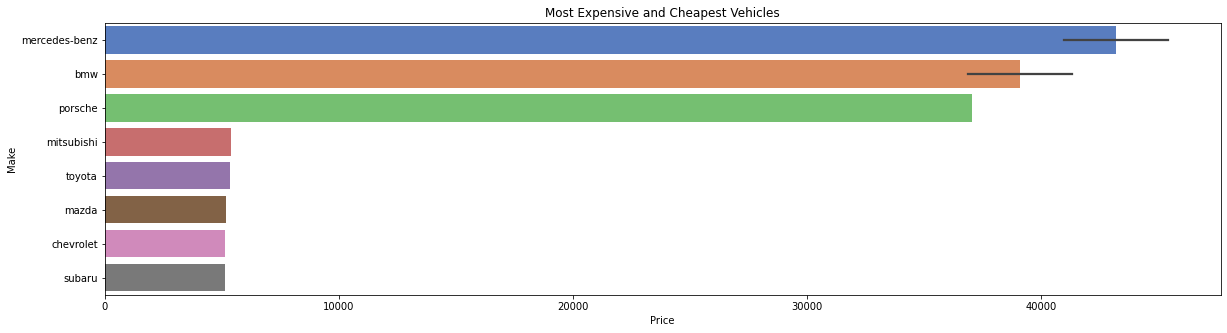

In [15]:
most_expensive = automobile_df.sort_values(by='price', ascending=False)
cheapest = automobile_df.sort_values(by='price', ascending=True)

# Create a new dataframe with top five most expensive and cheapest vehicles
frames = [most_expensive.iloc[0:5, :], cheapest.iloc[0:5, :]]
expensive_cheapest = pd.concat(frames).sort_values(by='price', ascending=False)

# Bar plot
plt.figure(figsize=(20, 5))
sns.barplot(data=expensive_cheapest, y='make', x='price', palette='muted')
plt.xlabel('Price')
plt.ylabel('Make')
plt.title("Most Expensive and Cheapest Vehicles")
plt.show()


2. **Vehicles with the Top 5 Horsepower Ratings**: 
   Compare the minimum and maximum horsepower. This comparison helps identify the different performance levels of each vehicle.

<ipython-input-16-43fdf433f4d3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hps, y='make', x='horsepower', palette='husl')


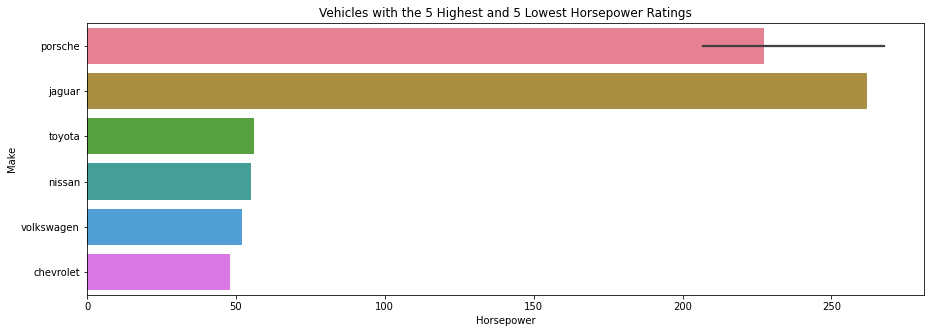

In [16]:
highest_hp = automobile_df.sort_values(by='horsepower', ascending=False)
lowest_hp = automobile_df.sort_values(by='horsepower', ascending=True)

# Create a new dataframe with top five highest and lowest horsepower ratings
frames = [highest_hp.iloc[0:5, :], lowest_hp.iloc[0:5, :]]
hps = pd.concat(frames).sort_values(by='horsepower', ascending=False)

# Bar plot
plt.figure(figsize=(15, 5))
sns.barplot(data=hps, y='make', x='horsepower', palette='husl')
plt.xlabel('Horsepower')
plt.title("Vehicles with the 5 Highest and 5 Lowest Horsepower Ratings")
plt.ylabel('Make')
plt.show()


In the figure titled "Engine vs. Horsepower," a clear positive correlation is evident between engine size and horsepower. This relationship indicates that, typically, as the engine size of a vehicle increases, so does its horsepower rating.

3. **Portion/Percentage of the Cars Belong to Each Body Style Category**: 
    Pie chart showing the percentage of cars in each body style category: `['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']`.


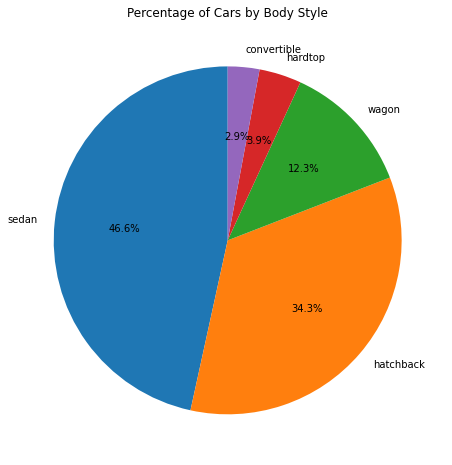

In [17]:
automobile_df.rename(columns={'body-style': 'body_style'}, inplace=True)

# Get frequency of cars of each body style
body_style_counts = automobile_df['body_style'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(body_style_counts, labels=body_style_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Cars by Body Style')
plt.show()

4. **How FWD, RWD, and 4WD Vehicles Compare in Price** 
   A box-and-whisker plot comparing the prices of FWD, RWD, and 4WD vehicles.

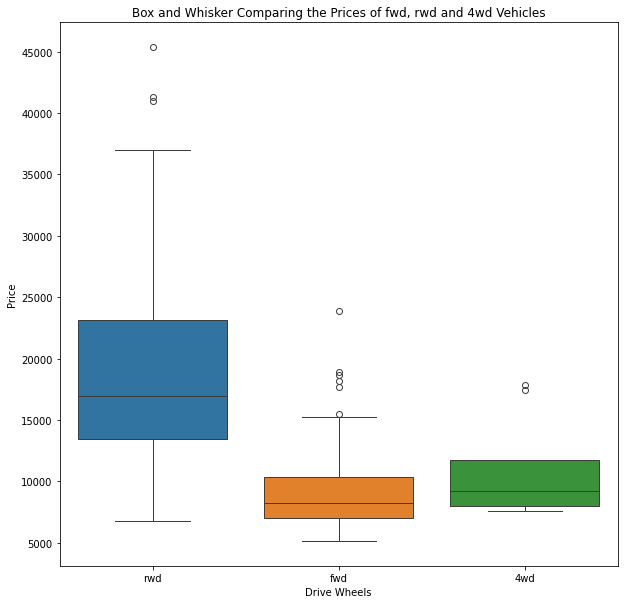

In [19]:
# Create a box and whiskers chart
fig = plt.figure(figsize = (10,10))
sns.boxplot(x="drive-wheels", y="price", data=automobile_df, hue = 'drive-wheels')
plt.xlabel("Drive Wheels")
plt.ylabel("Price")
plt.title("Box and Whisker Comparing the Prices of fwd, rwd and 4wd Vehicles")
plt.show()